In [51]:
#dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime as dt

In [53]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [54]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [55]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [ ]:
#Precipitation Analysis

In [56]:
#12 Months
prev_year = dt.date.today() - dt.timedelta(days=365)
today = dt.date.today


In [ ]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [57]:
#Dataframe for Percipitation
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.head()

,date,precipitation
0,2017-04-16,0.00
1,2017-04-17,0.02
2,2017-04-18,0.00
3,2017-04-19,0.02
4,2017-04-20,0.05


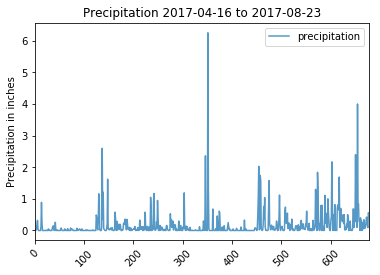

In [58]:
plt.figure(figsize=(18,4))
df.plot(rot=45,alpha=0.75)
plt.ylabel('Precipitation in inches')
plt.xlabel("")
plt.title("Precipitation 2017-04-16 to 2017-08-23")
plt.show()

In [59]:
#Station Analysis

In [61]:
# Query For Total Number of Stations
station_count = session.query(Station.station).count()
print(f"Total Stations: {station_count}")

# Query for Most Active Stations
activity = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

stations_df = pd.DataFrame.from_records(activity, columns=['Station','Observations'])
most_obs = stations_df["Station"][stations_df["Observations"].idxmax()]
print(f"Most Active Station: {most_obs}")

Total Stations: 9
Most Active Station: USC00519281


In [98]:
#List the stations and observation counts in descending order
results_1 = session.query(Measurement.station, func.count(Measurement.tobs))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.tobs).desc()).all()

df1 = pd.DataFrame(results_1, columns=['Station', 'Counts'])
df1.head()

,Station,Counts
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484


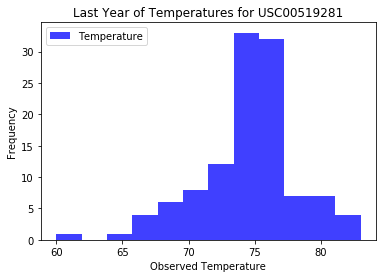

In [70]:
# plot the last 12 months of temperature data from the most active station
recent_temps = session.query(Measurement.station, Measurement.date, Measurement.tobs)\
    .filter(Measurement.date > year_ago).filter(Measurement.station == most_obs).all()
recent_temps_df = pd.DataFrame.from_records(recent_temps, columns=['Station','Date','Temperature'])

recent_temps_df.plot(kind='hist', bins=12, alpha=0.75, color='blue')
plt.title(f"Last Year of Temperatures for {most_obs}")
plt.xlabel("Observed Temperature")
plt.show()



In [71]:
#Temperature Analysis


In [85]:
def calc_temps(start_date, end_date):
    minimum = session.query(func.min(Measurement.tobs)).filter(Measurement.date > start_date)\
                             .filter(Measurement.date < end_date).all()
    maximum = session.query(func.max(Measurement.tobs)).filter(Measurement.date > start_date)\
                             .filter(Measurement.date < end_date).all()
    average = session.query(func.avg(Measurement.tobs)).filter(Measurement.date > start_date)\
                             .filter(Measurement.date < end_date).all()
    return minimum, maximum, average

In [86]:
trip = calc_temps("2017-05-12","2017-05-29")

In [88]:
df = pd.DataFrame({'Min': trip[0][0], 'Max': trip[1][0], 'Avg': trip[2][0]}, columns=['Min','Avg','Max'])
df

,Min,Avg,Max
0,68,74.848837,87


In [105]:
recent_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > year_ago).all()
df2 = pd.DataFrame(recent_tobs, columns=['Date', 'Tobs'])
df2.head()

,Date,Tobs
0,2017-04-17,74
1,2017-04-18,75
2,2017-04-19,74
3,2017-04-20,78
4,2017-04-21,73


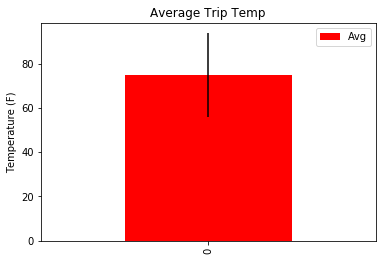

In [95]:
error = df['Max'].sub(df['Min'])
df.plot.bar(y='Avg',yerr=error, color='red')
plt.ylabel("Temperature (F)")
plt.title("Average Trip Temp")
plt.show()